In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns

In [94]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(X, y):
    tsne = TSNE()
    if X.shape[1] == 2:
        X_tsned = X
    else:
        X_tsned = tsne.fit_transform(X)
    plt.scatter(X_tsned[:, 0], X_tsned[:, 1], c=y)

## Линейные зависимости в данных

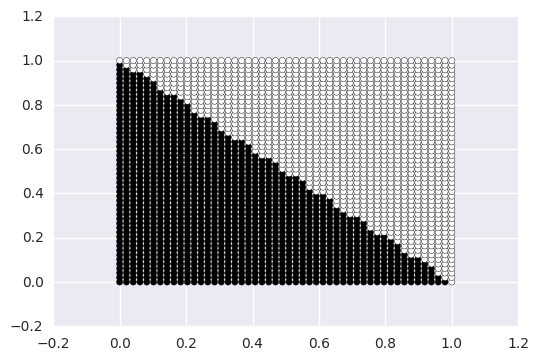

In [95]:
xv, yv = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
labels = X[:, 0] + X[:, 1] < 1
visualize(X, labels)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def test_data(X, labels):
    print "Decision Tree"
    for depth in [1, 2, 5, 8, 20]:
        print "depth={0} \tscore={1:.4f}".format(
            depth, np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth), X, labels, cv=5, scoring='accuracy')))
    
    print "Logistic regression"
    for C in np.logspace(-2, 4, 7):
        print "C={0}   \tscore={1:.4f}".format(
            C, np.mean(cross_val_score(LogisticRegression(C=C), X, labels, cv=5, scoring='accuracy')))

In [97]:
test_data(X, labels)

Decision Tree
depth=1 	score=0.5412
depth=2 	score=0.7028
depth=5 	score=0.7812
depth=8 	score=0.7888
depth=20 	score=0.7888
Logistic regression
C=0.01   	score=0.8206
C=0.1   	score=0.8879
C=1.0   	score=0.9128
C=10.0   	score=0.9384
C=100.0   	score=0.9616
C=1000.0   	score=0.9776
C=10000.0   	score=0.9844


In [98]:
X = np.hstack([X, np.sum(X, axis=1, keepdims=True)])

for depth in [1, 2, 5, 8, 20]:
    print "depth={0} \tscore={1:.4f}".format(
        depth, np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth), X, labels, cv=5, scoring='accuracy')))

depth=1 	score=0.9852
depth=2 	score=0.9852
depth=5 	score=0.9820
depth=8 	score=0.9820
depth=20 	score=0.9828


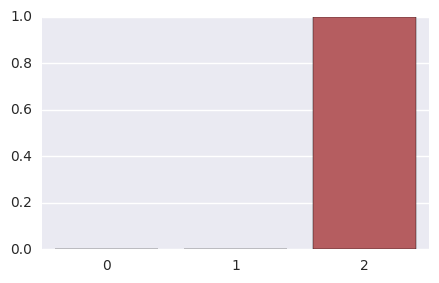

In [69]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, labels)
plt.figure(figsize=(5, 3))
sns.barplot(range(3), clf.feature_importances_)

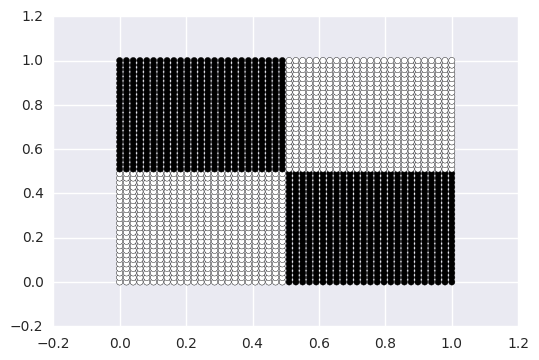

In [99]:
xv, yv = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 1, 50))
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
labels = ((X[:, 0] < 0.5) ^  (X[:, 1] < 0.5)).astype(int)
visualize(X, labels)

In [100]:
test_data(X, labels)

Decision Tree
depth=1 	score=0.1000
depth=2 	score=0.9040
depth=5 	score=1.0000
depth=8 	score=1.0000
depth=20 	score=1.0000
Logistic regression
C=0.01   	score=0.1624
C=0.1   	score=0.1168
C=1.0   	score=0.1000
C=10.0   	score=0.1000
C=100.0   	score=0.1000
C=1000.0   	score=0.1000
C=10000.0   	score=0.1000


## Время обучения

In [74]:
X_data, y_data = make_regression(n_samples=100000, n_features=30, random_state=42)

In [80]:
%%time
_ = DecisionTreeRegressor(max_depth=1).fit(X_data, y_data)

CPU times: user 484 ms, sys: 0 ns, total: 484 ms
Wall time: 477 ms


In [81]:
%%time
_ = DecisionTreeRegressor(max_depth=5).fit(X_data, y_data)

CPU times: user 2.18 s, sys: 0 ns, total: 2.18 s
Wall time: 2.15 s


In [82]:
%%time
_ = DecisionTreeRegressor(max_depth=10).fit(X_data, y_data)

CPU times: user 3.86 s, sys: 0 ns, total: 3.86 s
Wall time: 3.8 s


In [83]:
%%time
_ = LinearRegression().fit(X_data, y_data)

CPU times: user 180 ms, sys: 0 ns, total: 180 ms
Wall time: 177 ms
